In [17]:
import pandas as pd  # Data wrangling
import numpy as np  # Vector manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization
import scipy.stats as stats

# Import metrics and models from scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Import metrics
from sklearn.metrics import (precision_score, recall_score, confusion_matrix,
                             classification_report, accuracy_score, f1_score,
                             roc_auc_score, ConfusionMatrixDisplay)

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline


In [18]:
raw = pd.read_csv(r"C:\Users\Nikku28\OneDrive\Desktop\Excel Files for Practice\churn_prediction.csv")

In [19]:
raw.shape

(28382, 21)

In [20]:
raw.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [21]:
raw.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [24]:
# Identify variable with integer datatype
raw.dtypes[raw.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [25]:
raw.set_index('customer_id', inplace=True)

In [26]:
raw.drop('branch_code', axis=1, inplace=True)

In [27]:
raw['customer_nw_category'] = raw['customer_nw_category'].astype('category')
raw.dtypes[raw.dtypes == 'int64']

vintage    int64
age        int64
churn      int64
dtype: object

In [28]:
raw.dtypes[raw.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [29]:
raw['dependents'] = raw['dependents'].astype('int', errors='ignore')
raw['city'] = pd.Categorical(raw['city'])

#checking
raw[['dependents', 'city']].dtypes

dependents     float64
city          category
dtype: object

In [30]:
raw['city'].dtypes

CategoricalDtype(categories=[   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,
                     7.0,    8.0,    9.0,
                  ...
                  1640.0, 1641.0, 1642.0, 1643.0, 1644.0, 1645.0, 1646.0,
                  1647.0, 1648.0, 1649.0],
, ordered=False, categories_dtype=float64)

In [31]:
raw.dtypes[raw.dtypes == 'object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [32]:
raw['gender'] = raw['gender'].astype('category')
raw['occupation'] = raw['occupation'].astype('category')
raw[['gender', 'occupation']].dtypes

gender        category
occupation    category
dtype: object

In [34]:
raw['last_transaction'] = pd.to_datetime(raw['last_transaction'])

current_date = pd.to_datetime('today')
raw['days_since_last_transaction'] = (current_date - raw['last_transaction']).dt.days

raw.drop(columns = ['last_transaction'], inplace=True)
print(raw[['days_since_last_transaction']].head())

             days_since_last_transaction
customer_id                             
1                                 2064.0
2                                 1900.0
4                                    NaN
5                                 1987.0
6                                 1898.0


In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28382 entries, 1 to 30301
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         28382 non-null  int64   
 1   age                             28382 non-null  int64   
 2   gender                          27857 non-null  category
 3   dependents                      25919 non-null  float64 
 4   occupation                      28302 non-null  category
 5   city                            27579 non-null  category
 6   customer_nw_category            28382 non-null  category
 7   current_balance                 28382 non-null  float64 
 8   previous_month_end_balance      28382 non-null  float64 
 9   average_monthly_balance_prevQ   28382 non-null  float64 
 10  average_monthly_balance_prevQ2  28382 non-null  float64 
 11  current_month_credit            28382 non-null  float64 
 12  previous_month_credit  

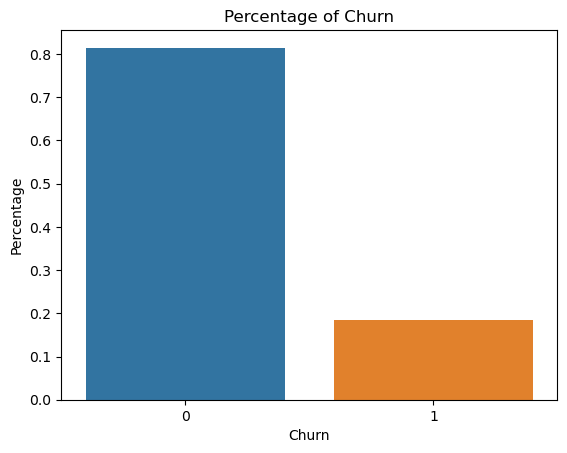

In [36]:
churn_percentage = raw['churn'].value_counts(normalize=True)

sns.barplot(x=churn_percentage.index, y=churn_percentage.values)
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of Churn')
plt.show()

In [37]:
print('n unique value')
categorical_columns = raw.select_dtypes(include = ['category']).columns.values
for column in categorical_columns:
    print(column)
    print(raw[column].nunique())
    print('---')

n unique value
gender
2
---
occupation
5
---
city
1604
---
customer_nw_category
3
---


In [38]:
def proportional_aggregation(df, x, y):
    temp_df = df.groupby([x,y], as_index = False).size()
    temp_df['proportional'] = temp_df['size'] / temp_df.groupby(x)['size'].transform('sum')
    return temp_df

C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\3852001677.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([x,y], as_index = False).size()
C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\3852001677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df['proportional'] = temp_df['size'] / temp_df.groupby(x)['size'].transform('sum')
C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

AttributeError: 'numpy.int64' object has no attribute 'startswith'

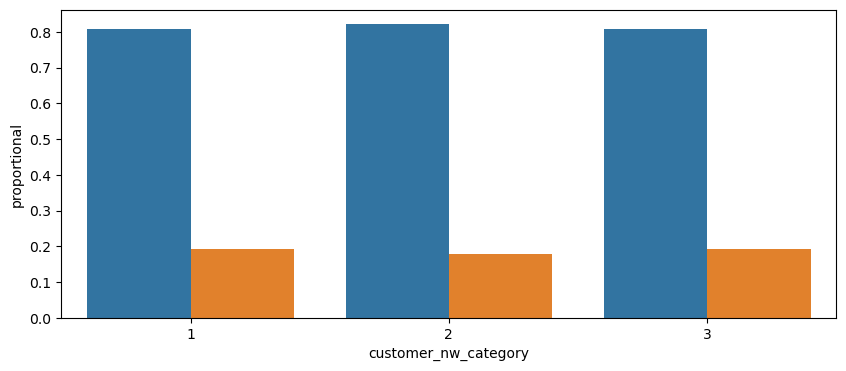

In [39]:
for column in ['customer_nw_category', 'occupation']:
    data=proportional_aggregation(raw, column, "churn")

    plt.figure(figsize=(10, 4))  # Width, Height
    sns.barplot(x=column, y='proportional', data=data, hue='churn')
    plt.xlabel(column)
    plt.ylabel('Proportional')
    plt.title(f'Proportional by churn and {column}')
    plt.show()

C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\3852001677.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([x,y], as_index = False).size()
C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\3852001677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df['proportional'] = temp_df['size'] / temp_df.groupby(x)['size'].transform('sum')
C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\1225115747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

AttributeError: 'numpy.int64' object has no attribute 'startswith'

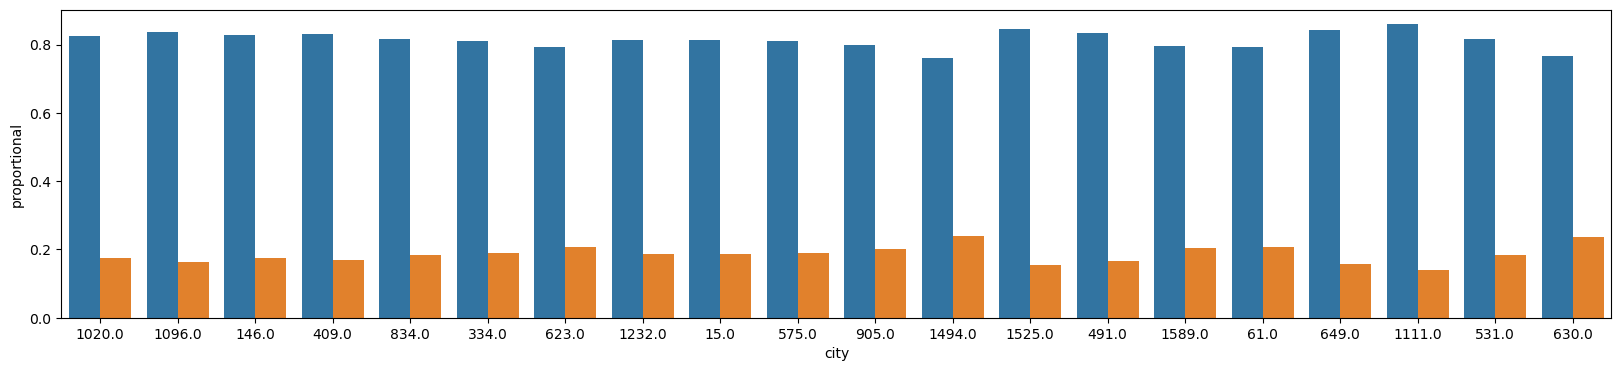

In [40]:
# Aggregate data by city and churn status to get the total churn size for each city
city_churn_size = proportional_aggregation(raw, "city", "churn")

# Select the top 10 cities with the highest churn rate
top_10_churn_cities = city_churn_size[city_churn_size['churn'] == 1].nlargest(20, 'size')['city'].tolist()

# Filter the DataFrame with the city column in top_10_churn_cities
city_churn_data = city_churn_size[city_churn_size['city'].isin(top_10_churn_cities)]

# Convert 'city' column to categorical data type
city_churn_data['city'] = pd.Categorical(city_churn_data['city'], categories=top_10_churn_cities, ordered=True)

# # Step 3: Plot the data
plt.figure(figsize=(20, 4))  # Width, Height
sns.barplot(x='city', y='proportional', data=city_churn_data, hue='churn')
plt.xlabel('City')
plt.ylabel('Size')
plt.title('Data Size by Churn for Top 50 Cities')
plt.show()

In [41]:
numerical_columns = raw.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[~numerical_columns.isin(['churn'])].values

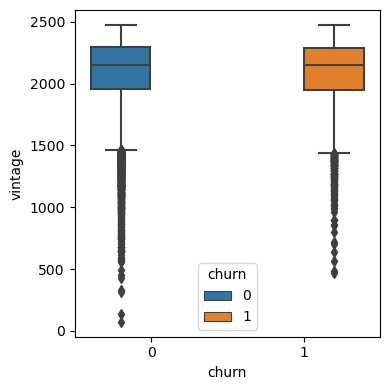

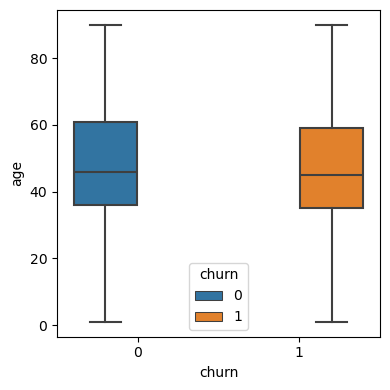

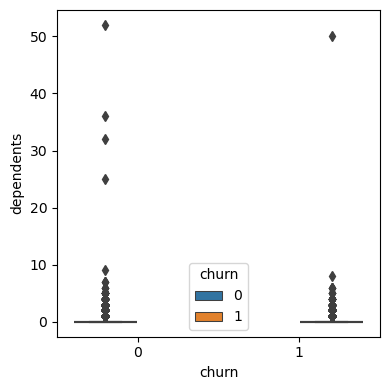

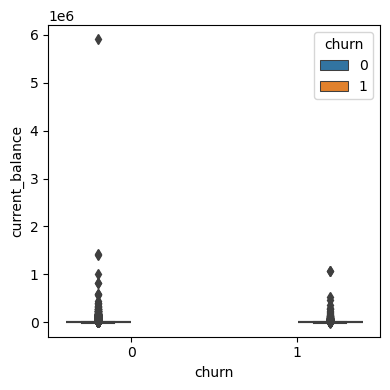

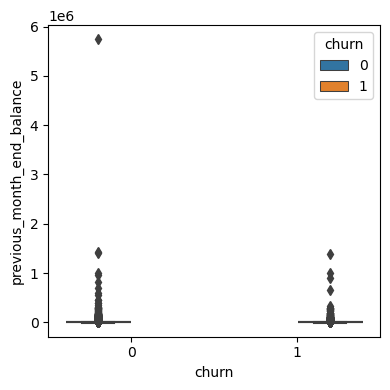

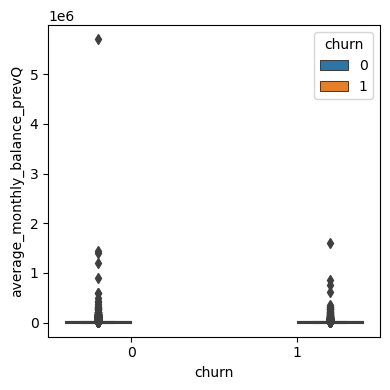

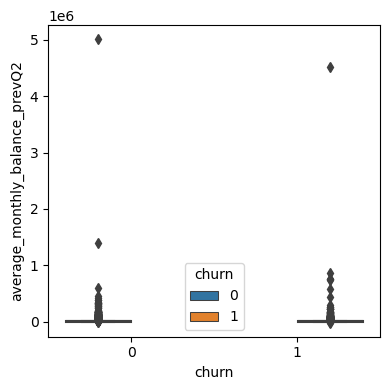

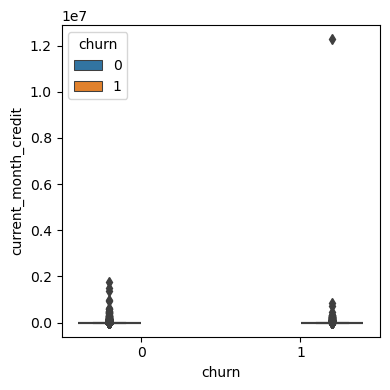

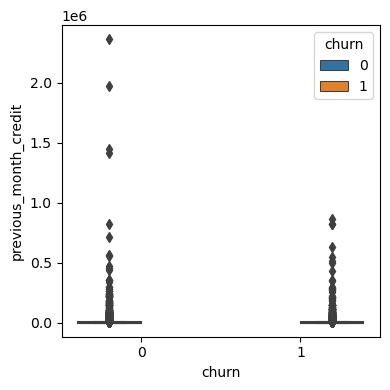

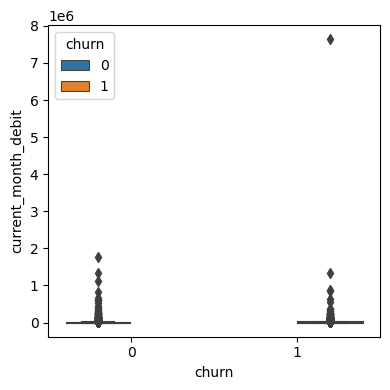

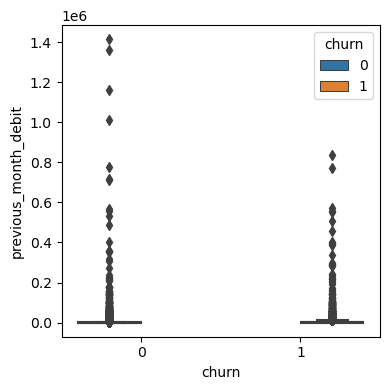

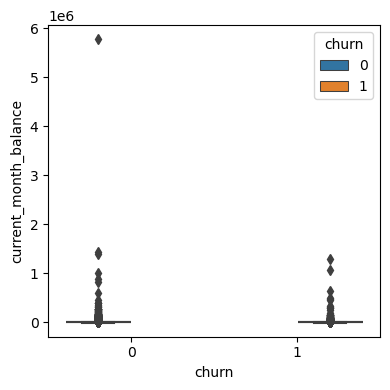

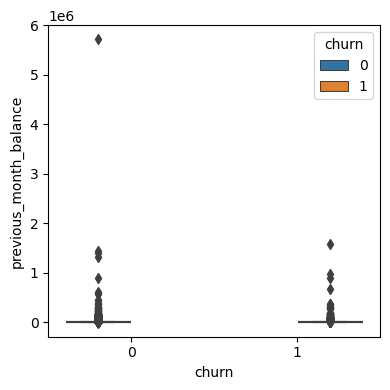

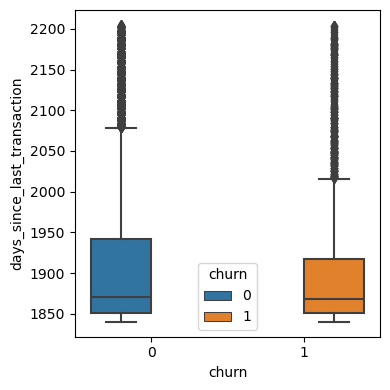

In [42]:
for column in numerical_columns:
    raw_without_na = raw[[column, 'churn']].dropna()
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='churn', y=column, data=raw_without_na, hue='churn')
    plt.tight_layout()
    plt.xlabel('churn')
    plt.ylabel(column)
    plt.show()

In [43]:
raw.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                              category
customer_nw_category              category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
days_since_last_transaction        float64
dtype: object

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw, test_size = 0.2, random_state=42)

In [45]:
train['churn'].value_counts()

churn
0    18483
1     4222
Name: count, dtype: int64

In [46]:
train.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                              category
customer_nw_category              category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
days_since_last_transaction        float64
dtype: object

In [47]:
train.isnull().sum()

vintage                              0
age                                  0
gender                             427
dependents                        1989
occupation                          68
city                               633
customer_nw_category                 0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
days_since_last_transaction       2552
dtype: int64

In [48]:
train.isin(['unknown', 'Unknown', 'UNKNOWN', 'NaN', 'N/A']).sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
days_since_last_transaction       0
dtype: int64

In [49]:
missing_value_columns = ['gender', 'dependents', 'occupation', 'city', 'days_since_last_transaction']

modes = train.mode()

for column in missing_value_columns:
    mode = modes[column].values[0]
    train[column] = train[column].fillna(mode)
    test[column] = test[column].fillna(mode)

In [50]:
train.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
days_since_last_transaction       0
dtype: int64

In [52]:
test.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
days_since_last_transaction       0
dtype: int64

In [53]:
numerical_columns

array(['vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'days_since_last_transaction'],
      dtype=object)

In [54]:
def show_distribution_plots(data, cols):
    """
    Display three plots: histogram, Q-Q plot, and box plot for each columns

    Args:
        data (DataFrame): The input data
        cols (list): list of columns to be dislayed
    """
    for col in cols:
        plt.figure(figsize=(16, 4))
        plt.suptitle(col, fontsize=16)

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], bins=30)
        plt.title('Histogram')

        # # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[col])
        plt.title('Boxplot')

        # Adjust layout to prevent overlapping titles
        plt.tight_layout()

        plt.show()

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


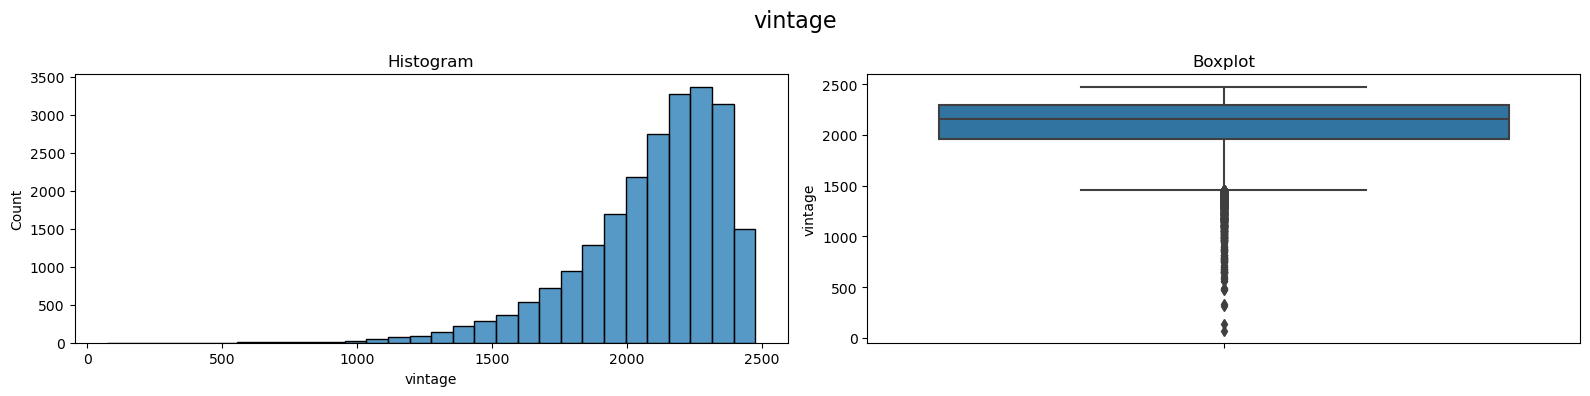

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


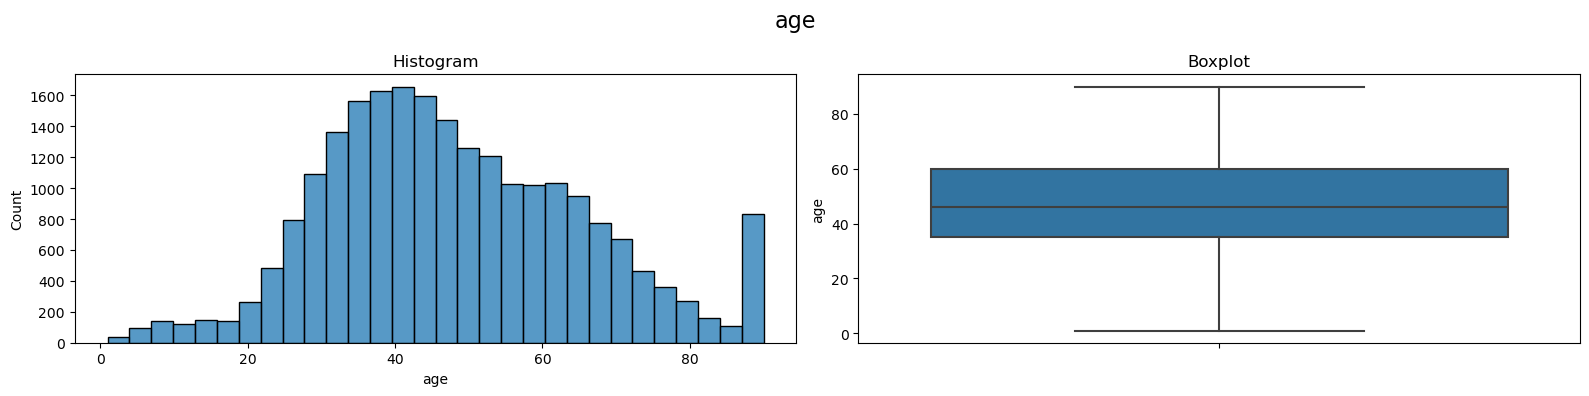

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


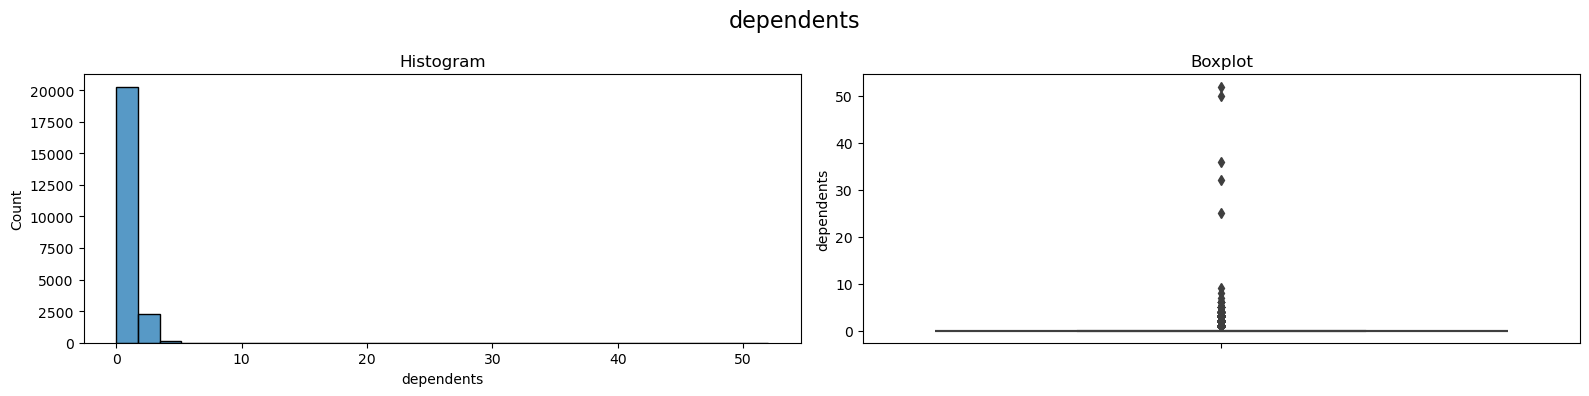

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


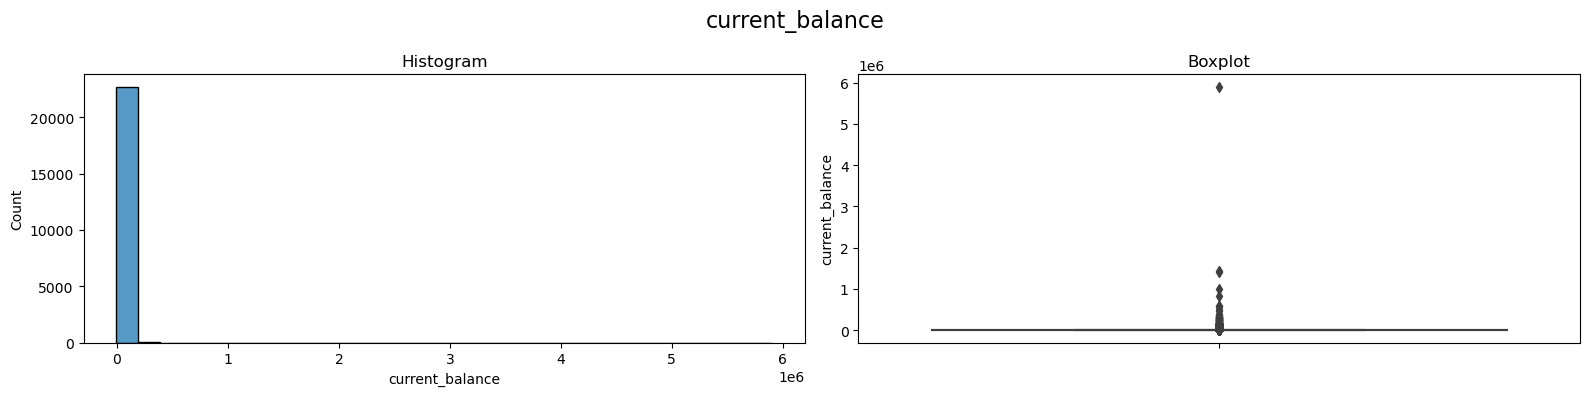

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


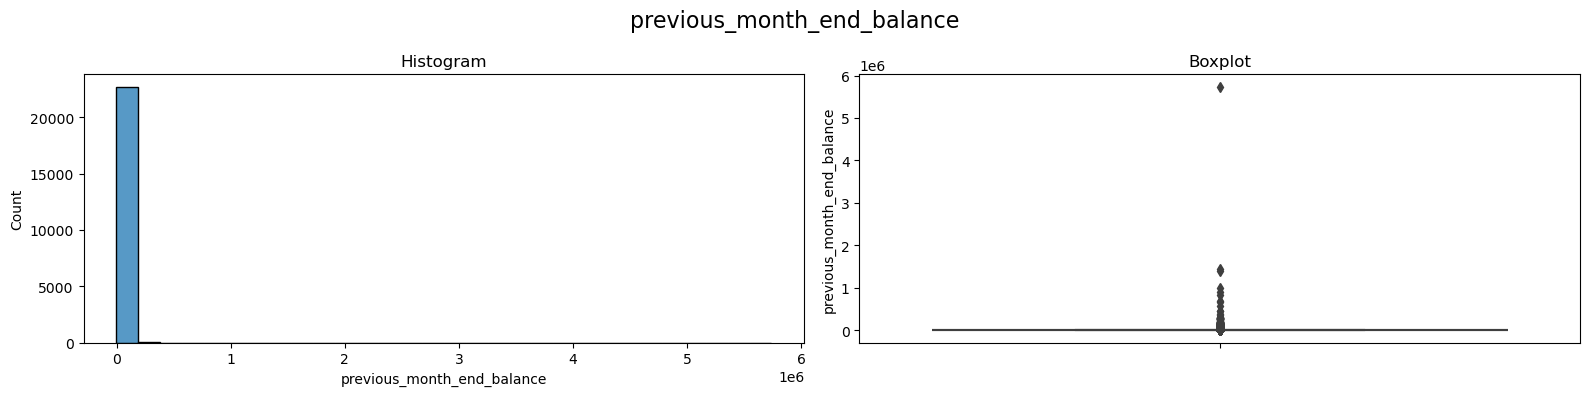

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


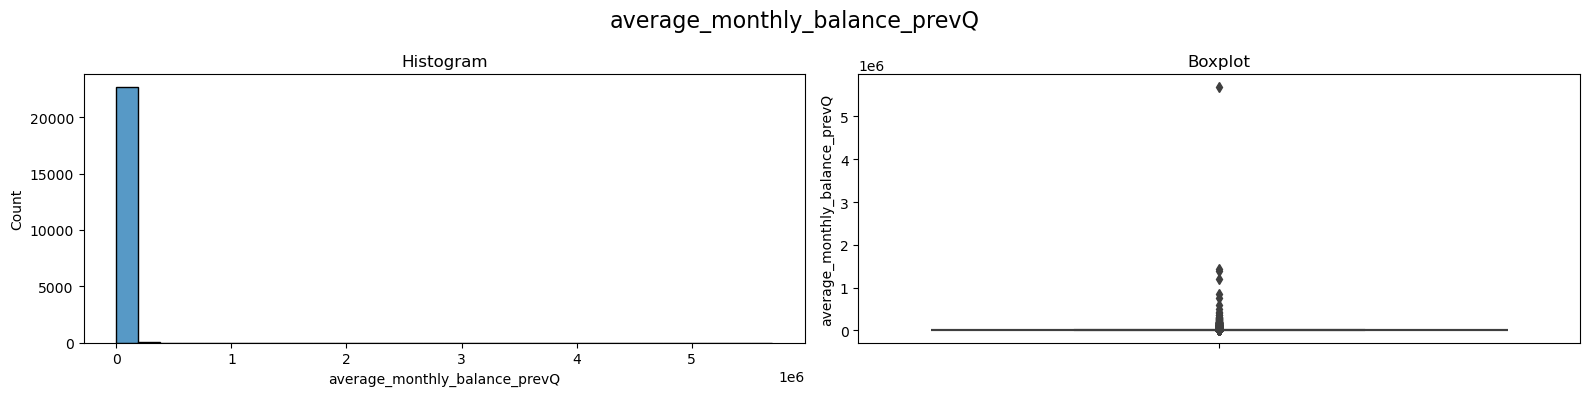

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


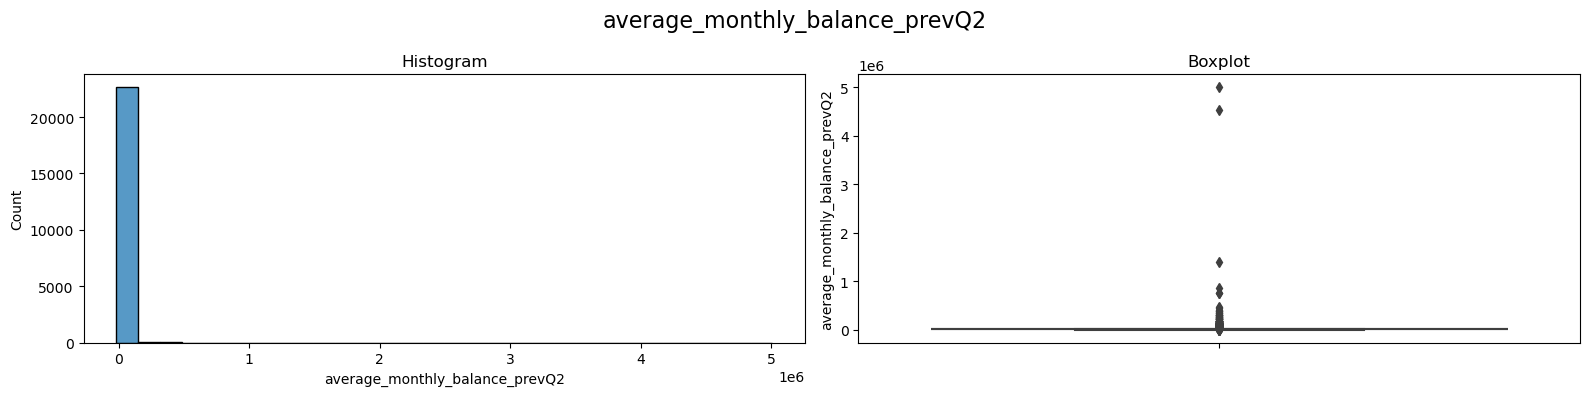

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


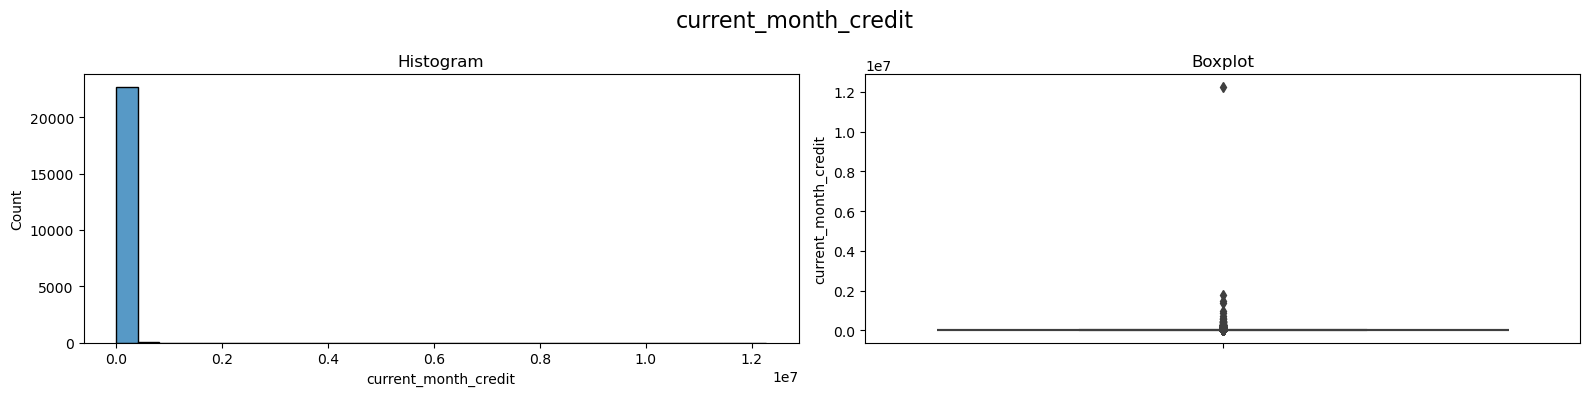

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


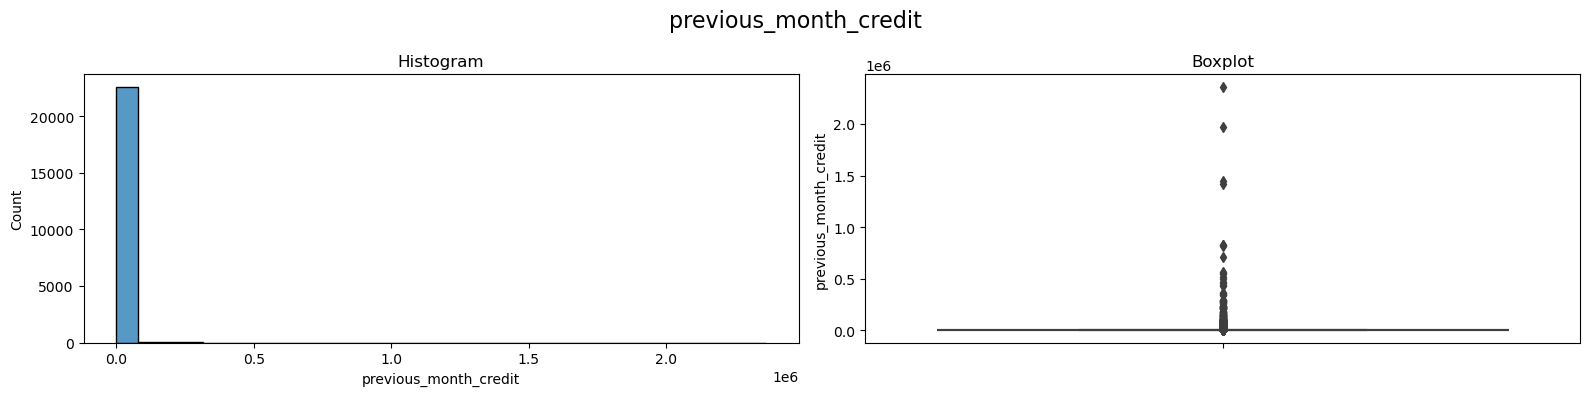

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


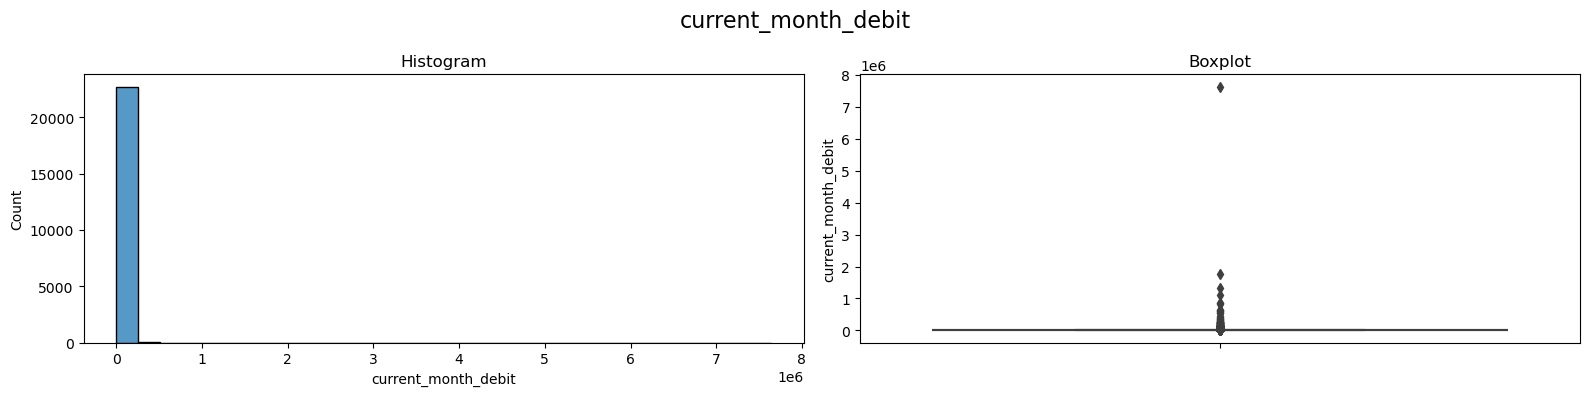

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


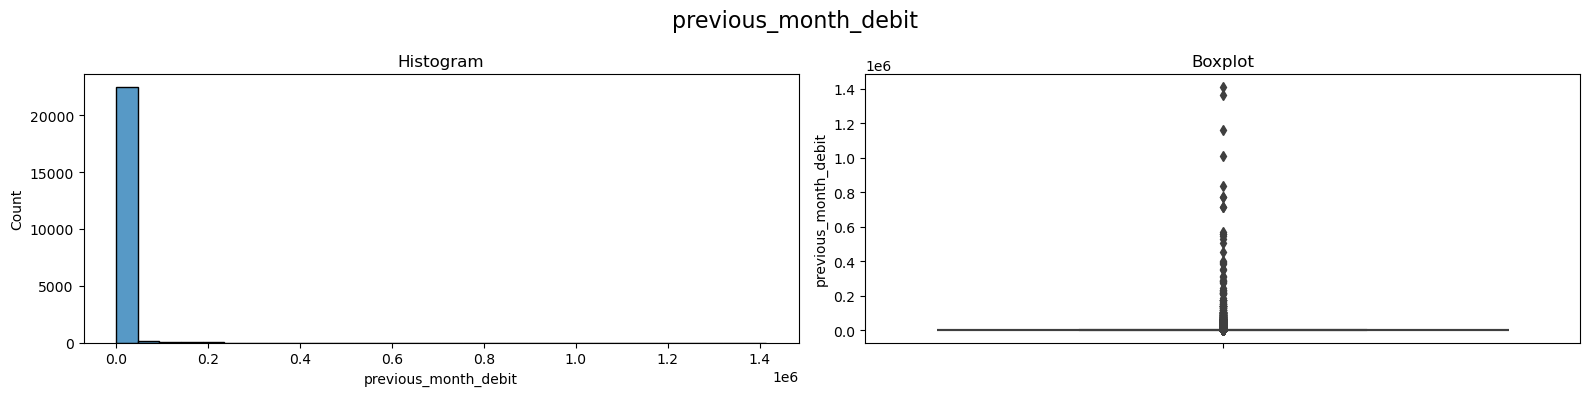

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


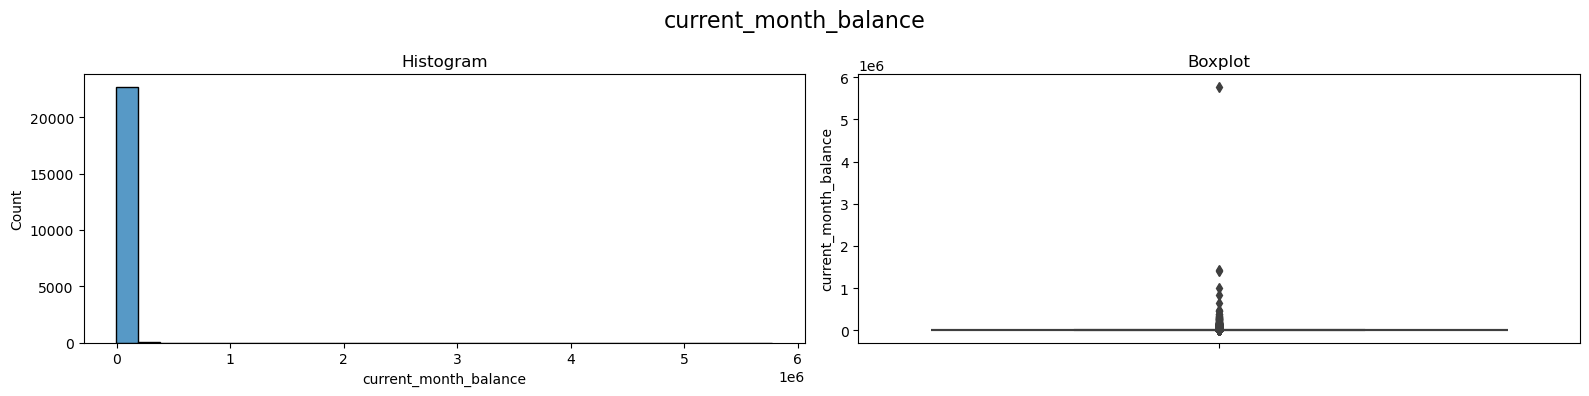

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


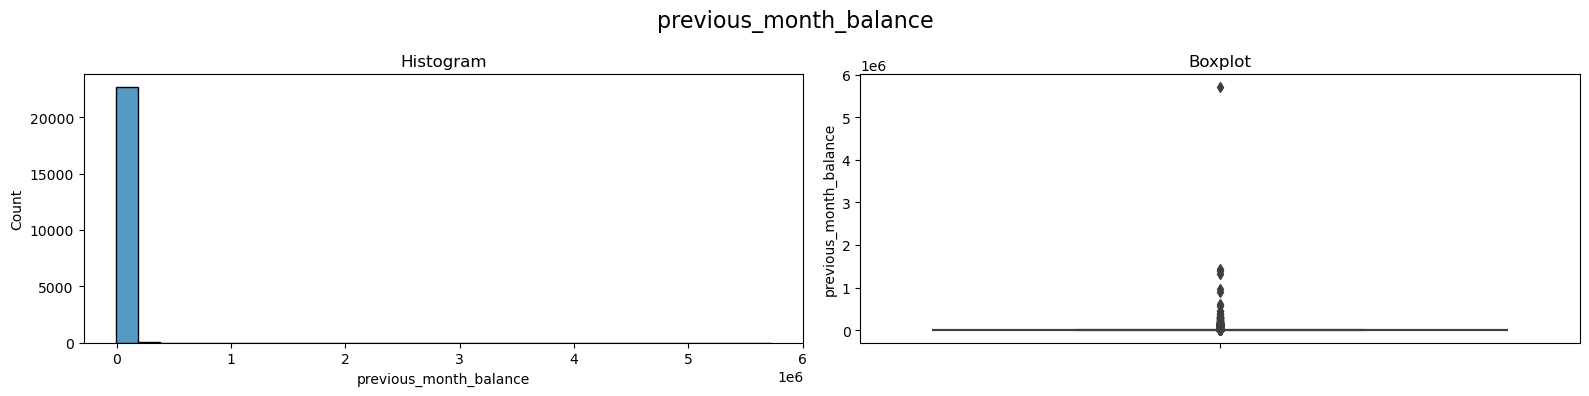

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


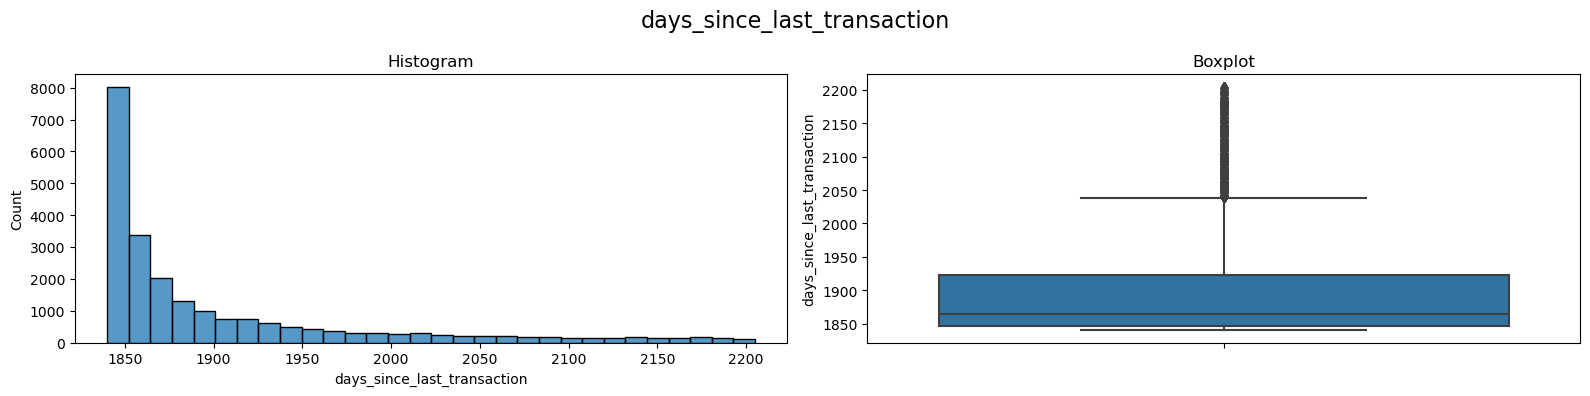

In [55]:
show_distribution_plots(train, numerical_columns)

In [56]:
class InterquartileOutlier:
    def __init__(self, custom_low_limit=None, custom_high_limit=None):
        """
        Initialize the InterquartileOutlier class.

        Args:
            custom_low_limit (float): Custom low limit for outlier detection.
            custom_high_limit (float): Custom high limit for outlier detection.
        """
        self.data = None
        self.custom_low_limit = custom_low_limit
        self.custom_high_limit = custom_high_limit
        self.q1 = None
        self.q3 = None
        self.iqr = None
        self.quartile_high_limit = None
        self.quartile_low_limit = None

    def fit(self, data):
        """
        Fit the data to calculate quartiles, IQR, and outlier limits.

        Args:
            data (pd.Series): The input data for fitting.
        """
        self.data = data
        self.q1, self.q3 = self.data.quantile([0.25, 0.75])
        self.iqr = self.q3 - self.q1
        self.quartile_high_limit = self.q3 + 1.5 * self.iqr
        self.quartile_low_limit = self.q1 - 1.5 * self.iqr

    def transform(self, data=None):
        """
        Transform the data by handling outliers.

        Args:
            data (pd.Series): The input data to be transformed. If None, the previously fitted data will be transformed.

        Returns:
            pd.Series: The transformed data with outliers handled.
        """
        if data is None:
            if self.data is None:
                raise ValueError("No data to transform. Call fit(data) or provide data to transform.")
            data = self.data

        high_limit = self.custom_high_limit if self.custom_high_limit is not None and self.custom_high_limit < self.quartile_high_limit else self.quartile_high_limit
        low_limit = self.custom_low_limit if self.custom_low_limit is not None and self.custom_low_limit > self.quartile_low_limit else self.quartile_low_limit

        # Clip values to the specified limits
        return np.clip(data, low_limit, high_limit)

In [57]:
for col in numerical_columns:

    custom_low_limit = None
    custom_high_limit = None
    # Clip age column in range between 17 and 90 as it is normal age of humen
    if col == 'Age':
        custom_low_limit = 17
        custom_high_limit = 90

    interquartile_outlier = InterquartileOutlier(custom_low_limit=custom_low_limit, custom_high_limit=custom_high_limit)
    interquartile_outlier.fit(train[col])

    train[col] = interquartile_outlier.transform(data=train[col])
    test[col] = interquartile_outlier.transform(data=test[col])

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


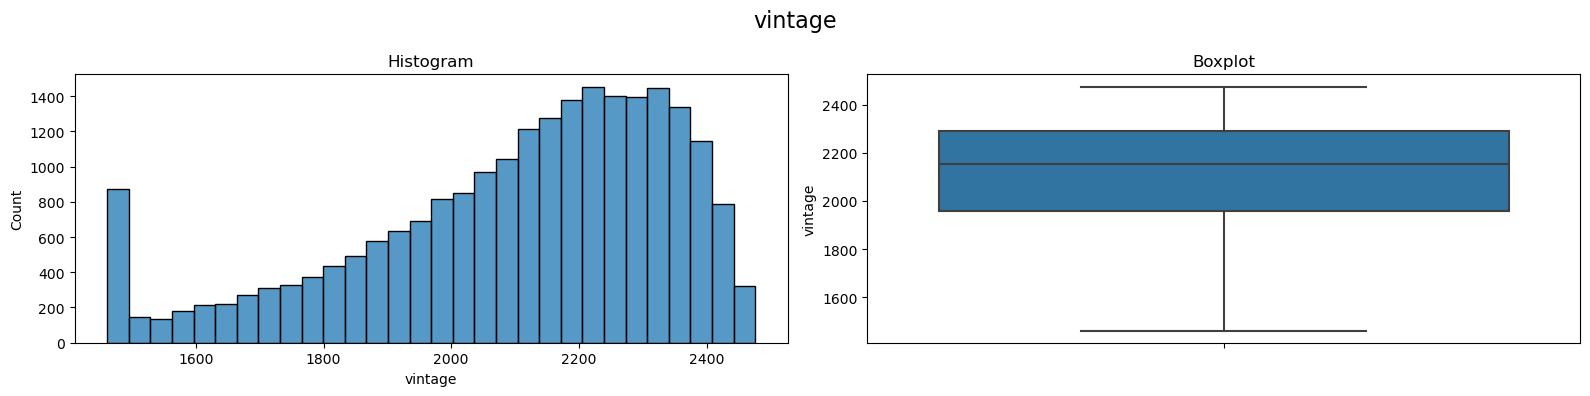

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


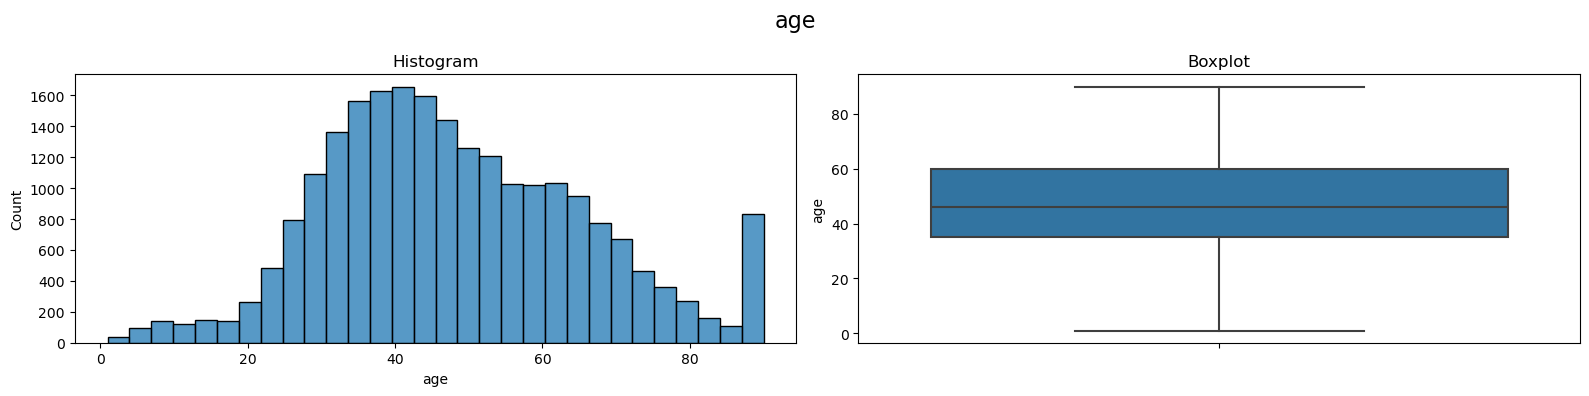

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


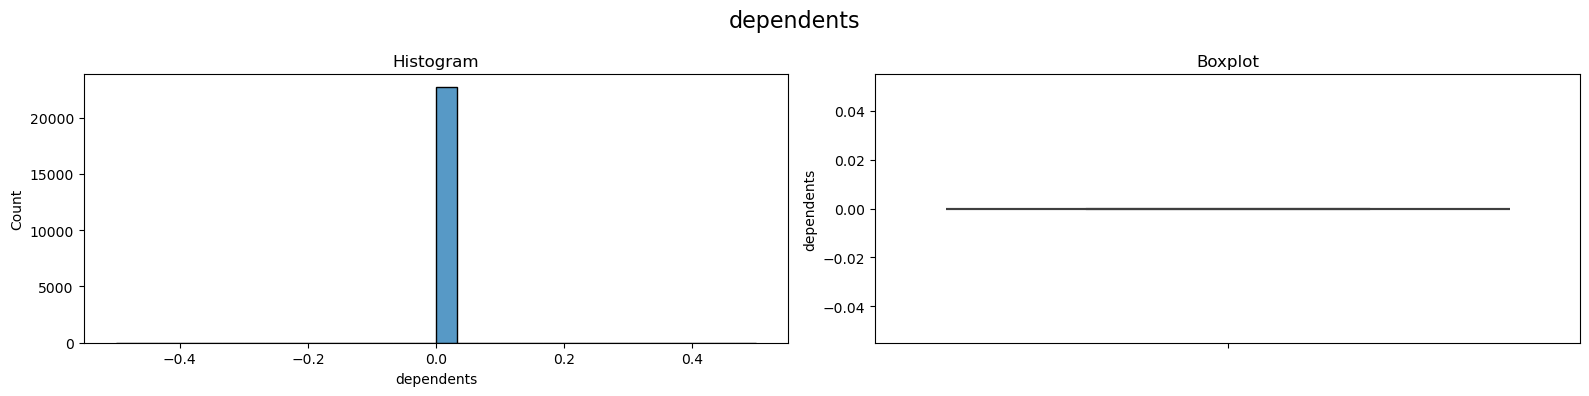

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


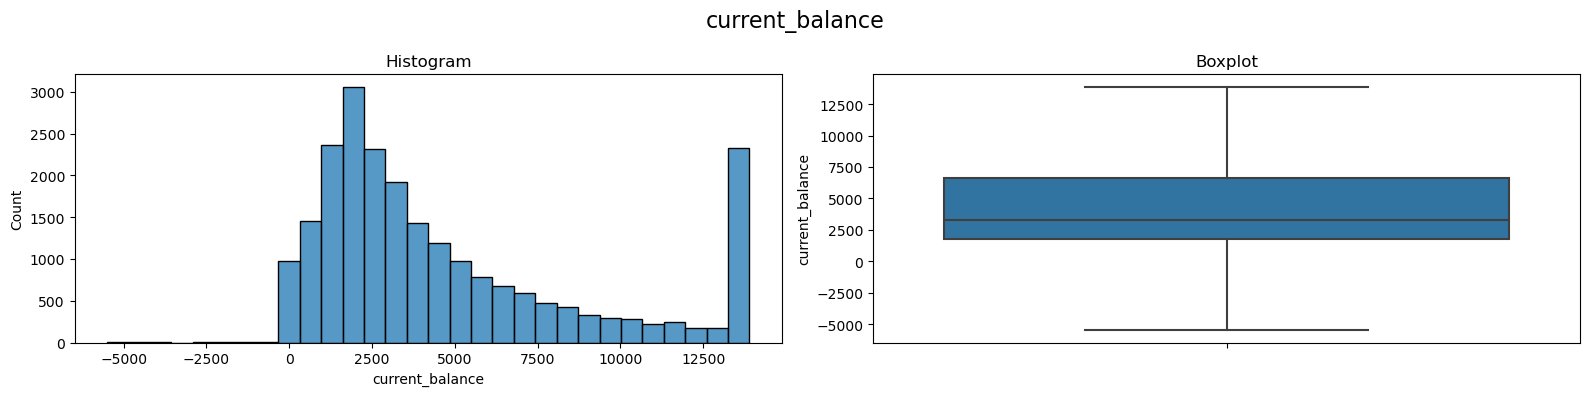

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


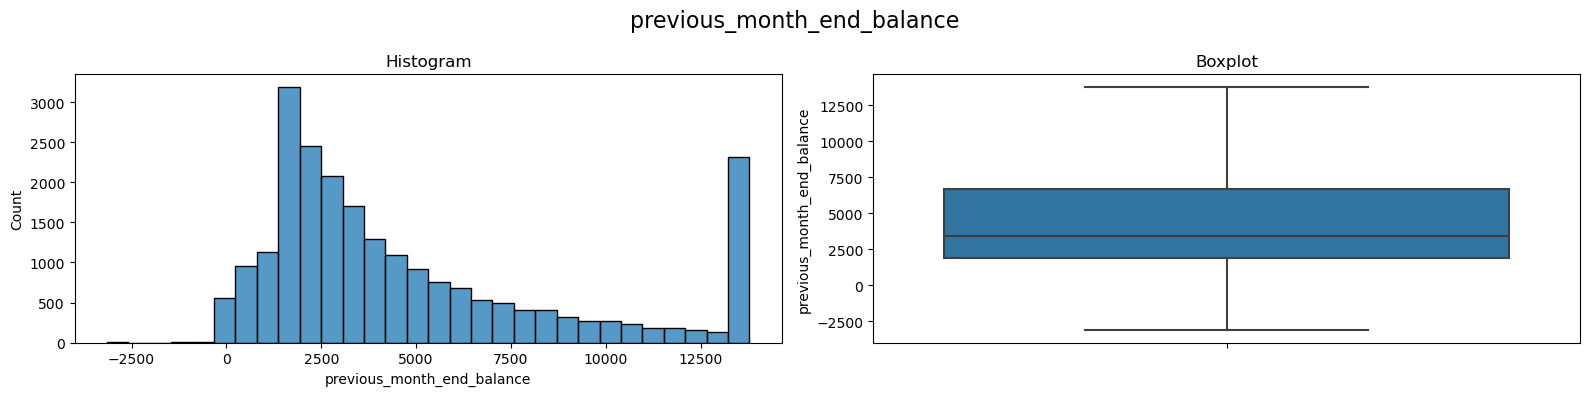

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


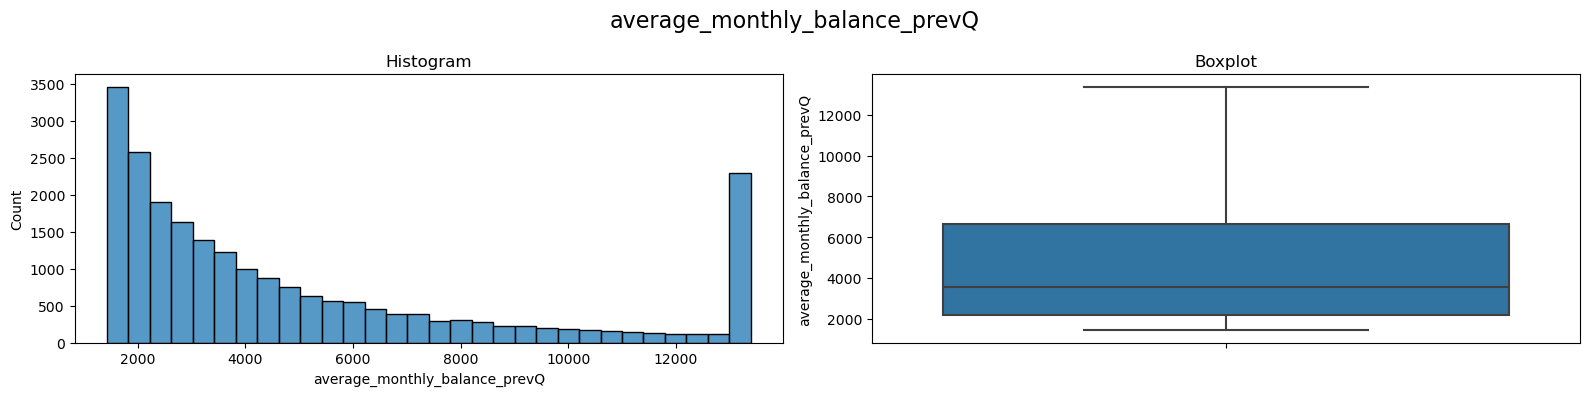

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


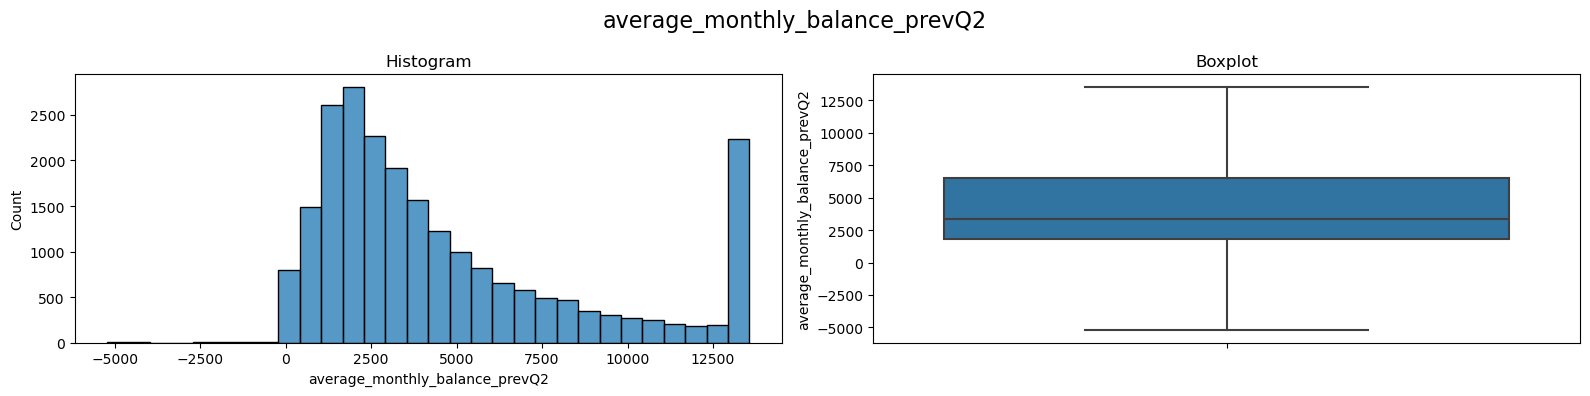

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


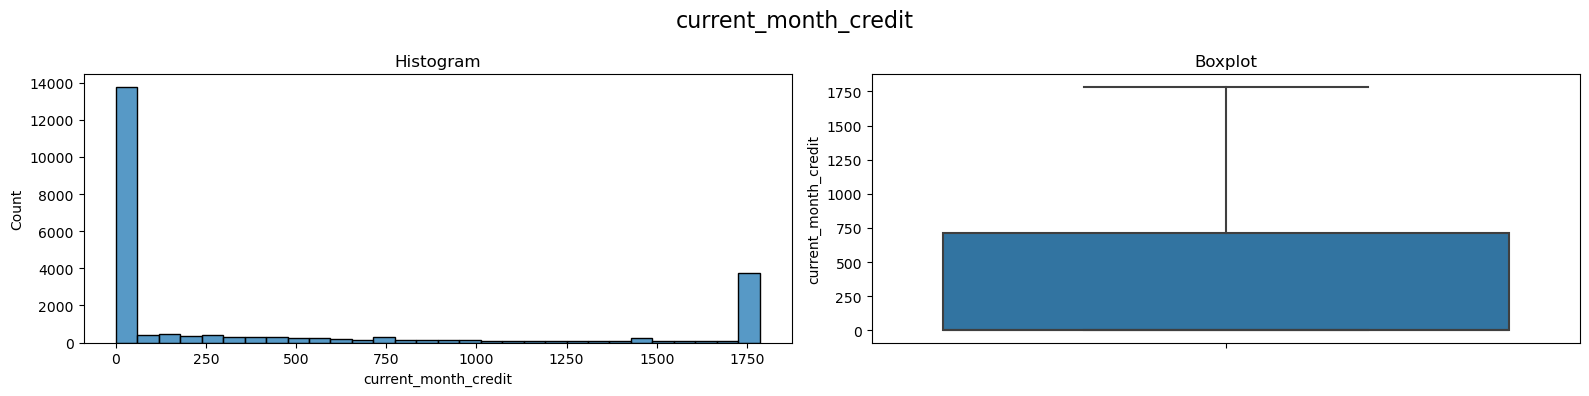

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


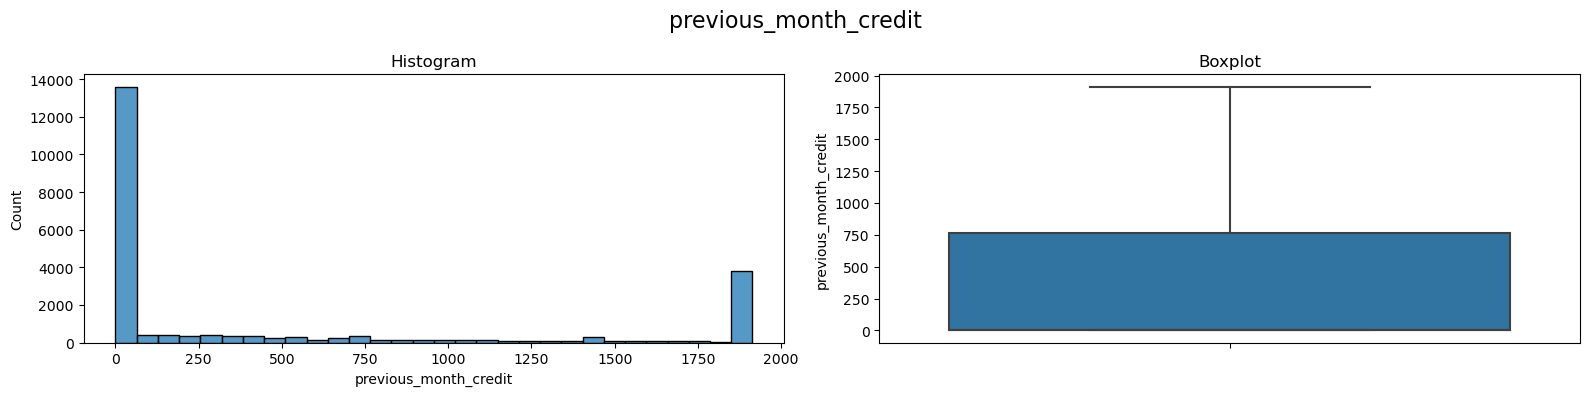

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


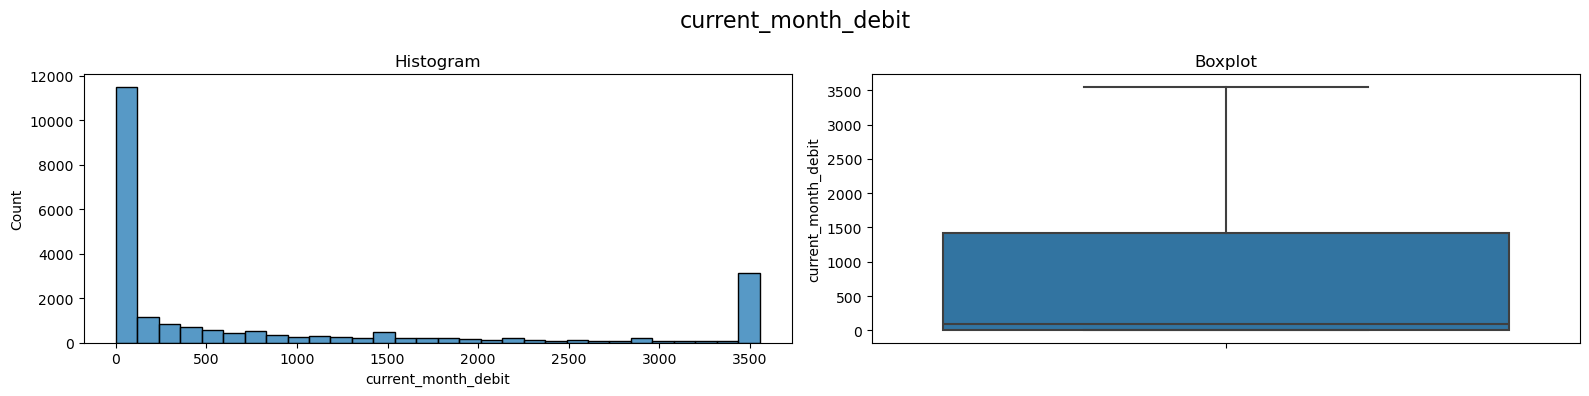

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


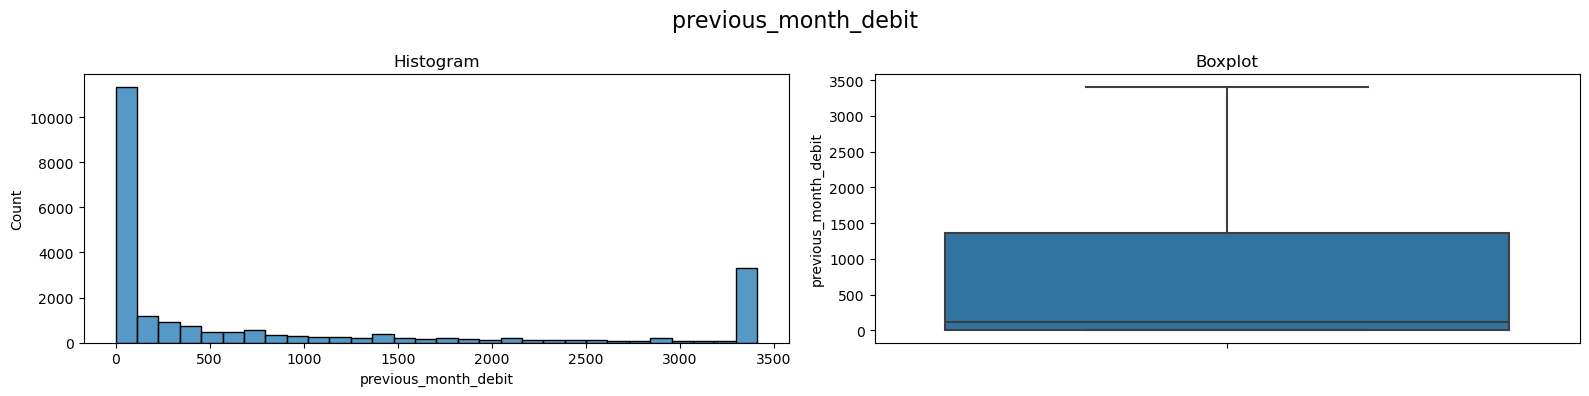

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


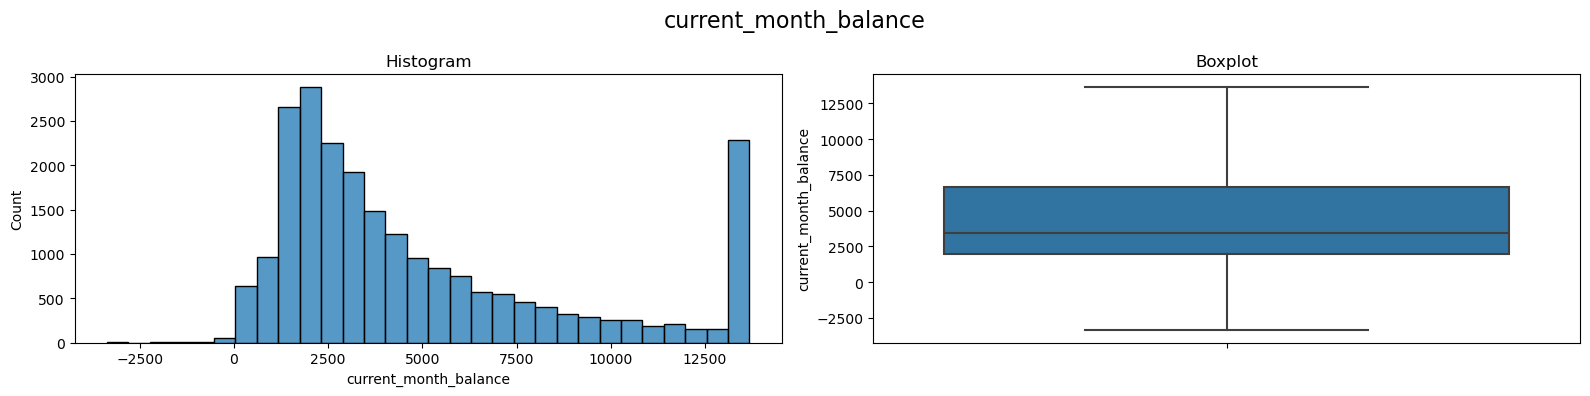

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


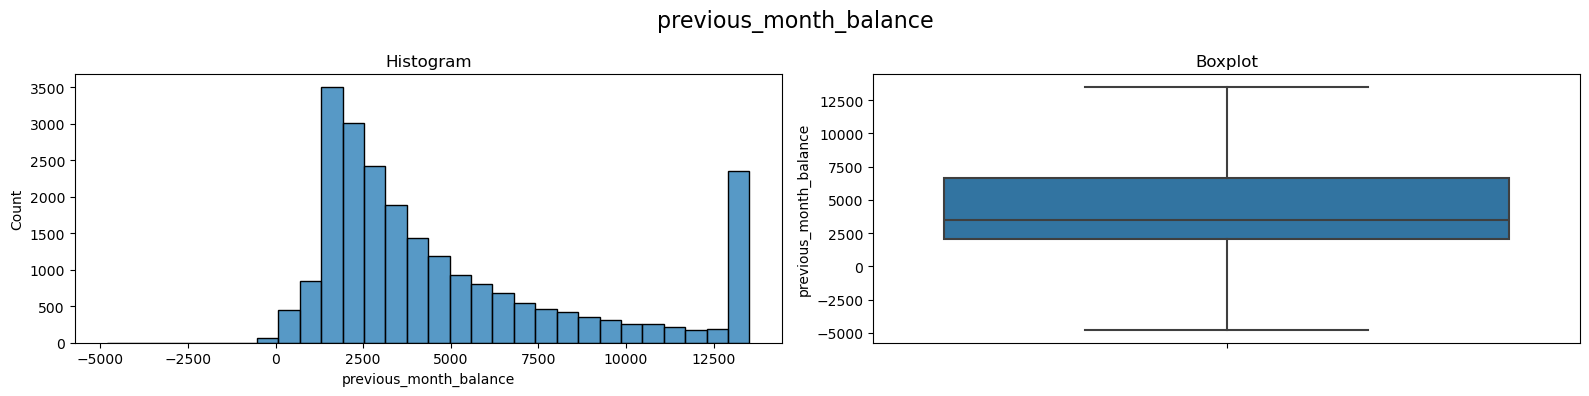

C:\Users\Nikku28\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


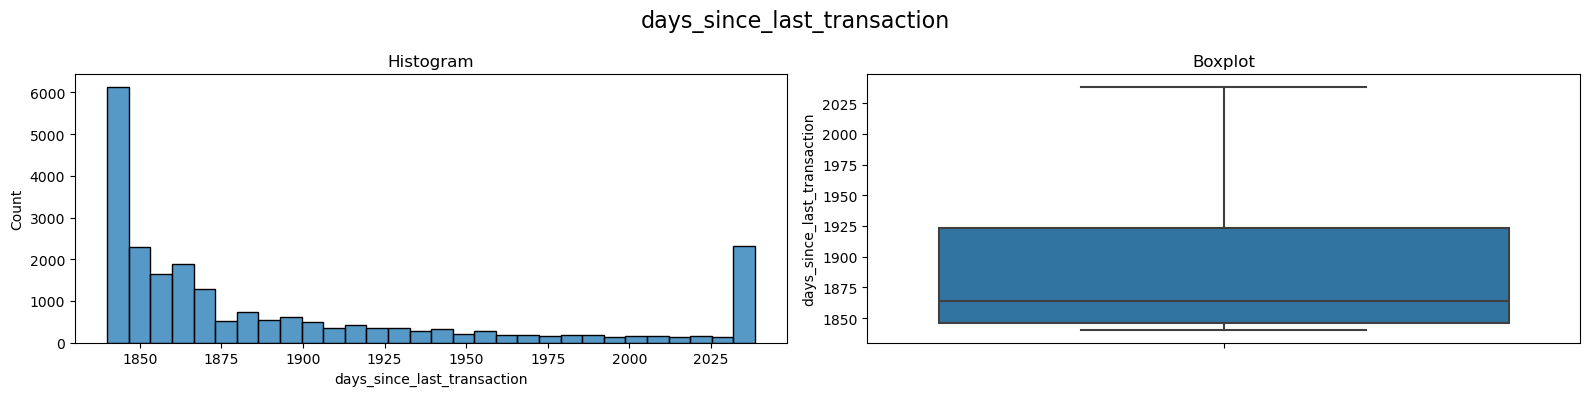

In [58]:
show_distribution_plots(train, numerical_columns)

In [59]:
for columns in categorical_columns:
    display(train[column].value_counts())

days_since_last_transaction
1840.0    3888
2038.5    2177
1843.0     675
1854.0     537
1846.0     499
1844.0     497
1845.0     463
1847.0     452
1853.0     393
1851.0     392
1849.0     386
1861.0     380
1857.0     369
1860.0     369
1852.0     366
1868.0     350
1859.0     339
1858.0     321
1864.0     313
1863.0     276
1866.0     273
1850.0     256
1867.0     249
1865.0     246
1875.0     188
1873.0     179
1871.0     177
1880.0     164
1870.0     155
1872.0     152
1888.0     145
1889.0     142
1881.0     142
1882.0     138
1879.0     134
1878.0     134
1901.0     130
1893.0     128
1887.0     121
1896.0     113
1903.0     113
1902.0     111
1895.0     110
1886.0     107
1892.0     102
1900.0     102
1894.0      94
1885.0      94
1917.0      91
1916.0      91
1913.0      89
1935.0      88
1884.0      86
1909.0      85
1931.0      81
1898.0      81
1923.0      80
1899.0      79
1910.0      78
1920.0      76
1915.0      71
1948.0      69
1908.0      69
1930.0      69
1914.0      

days_since_last_transaction
1840.0    3888
2038.5    2177
1843.0     675
1854.0     537
1846.0     499
1844.0     497
1845.0     463
1847.0     452
1853.0     393
1851.0     392
1849.0     386
1861.0     380
1857.0     369
1860.0     369
1852.0     366
1868.0     350
1859.0     339
1858.0     321
1864.0     313
1863.0     276
1866.0     273
1850.0     256
1867.0     249
1865.0     246
1875.0     188
1873.0     179
1871.0     177
1880.0     164
1870.0     155
1872.0     152
1888.0     145
1889.0     142
1881.0     142
1882.0     138
1879.0     134
1878.0     134
1901.0     130
1893.0     128
1887.0     121
1896.0     113
1903.0     113
1902.0     111
1895.0     110
1886.0     107
1892.0     102
1900.0     102
1894.0      94
1885.0      94
1917.0      91
1916.0      91
1913.0      89
1935.0      88
1884.0      86
1909.0      85
1931.0      81
1898.0      81
1923.0      80
1899.0      79
1910.0      78
1920.0      76
1915.0      71
1948.0      69
1908.0      69
1930.0      69
1914.0      

days_since_last_transaction
1840.0    3888
2038.5    2177
1843.0     675
1854.0     537
1846.0     499
1844.0     497
1845.0     463
1847.0     452
1853.0     393
1851.0     392
1849.0     386
1861.0     380
1857.0     369
1860.0     369
1852.0     366
1868.0     350
1859.0     339
1858.0     321
1864.0     313
1863.0     276
1866.0     273
1850.0     256
1867.0     249
1865.0     246
1875.0     188
1873.0     179
1871.0     177
1880.0     164
1870.0     155
1872.0     152
1888.0     145
1889.0     142
1881.0     142
1882.0     138
1879.0     134
1878.0     134
1901.0     130
1893.0     128
1887.0     121
1896.0     113
1903.0     113
1902.0     111
1895.0     110
1886.0     107
1892.0     102
1900.0     102
1894.0      94
1885.0      94
1917.0      91
1916.0      91
1913.0      89
1935.0      88
1884.0      86
1909.0      85
1931.0      81
1898.0      81
1923.0      80
1899.0      79
1910.0      78
1920.0      76
1915.0      71
1948.0      69
1908.0      69
1930.0      69
1914.0      

days_since_last_transaction
1840.0    3888
2038.5    2177
1843.0     675
1854.0     537
1846.0     499
1844.0     497
1845.0     463
1847.0     452
1853.0     393
1851.0     392
1849.0     386
1861.0     380
1857.0     369
1860.0     369
1852.0     366
1868.0     350
1859.0     339
1858.0     321
1864.0     313
1863.0     276
1866.0     273
1850.0     256
1867.0     249
1865.0     246
1875.0     188
1873.0     179
1871.0     177
1880.0     164
1870.0     155
1872.0     152
1888.0     145
1889.0     142
1881.0     142
1882.0     138
1879.0     134
1878.0     134
1901.0     130
1893.0     128
1887.0     121
1896.0     113
1903.0     113
1902.0     111
1895.0     110
1886.0     107
1892.0     102
1900.0     102
1894.0      94
1885.0      94
1917.0      91
1916.0      91
1913.0      89
1935.0      88
1884.0      86
1909.0      85
1931.0      81
1898.0      81
1923.0      80
1899.0      79
1910.0      78
1920.0      76
1915.0      71
1948.0      69
1908.0      69
1930.0      69
1914.0      

In [60]:
# Perform one hot encoding to gender
train = pd.get_dummies(train, columns=['gender'], prefix='gender', )
test = pd.get_dummies(test, columns=['gender'], prefix='gender')

In [61]:
train.head()

,vintage,age,dependents,occupation,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction,gender_Female,gender_Male
customer_id,,,,,,,,,,,,,,,,,,,,
13405,2229,49,0.0,self_employed,1076.0,2,4136.36,4207.790,4401.15,88.31,0.21,0.210,0.21,0.21,4163.46,4577.610,0,1926.0,False,True
29473,2251,61,0.0,salaried,1020.0,2,4583.05,13784.035,12653.39,13567.87,1785.36,0.330,3553.91,2143.78,12711.67,13519.845,0,1846.0,False,True
14070,2201,61,0.0,salaried,338.0,3,973.41,2259.130,2185.23,2244.81,0.34,0.340,1286.06,0.34,2037.45,2259.130,1,1840.0,False,True
3983,2412,57,0.0,salaried,931.0,2,1356.24,1784.810,2280.21,5575.20,0.19,0.190,857.33,1857.33,1442.44,2203.240,0,2038.5,False,True
6687,1872,41,0.0,salaried,1020.0,3,1300.41,4381.080,3022.75,4161.41,0.30,1913.855,817.71,3411.11,1649.05,5432.890,0,1887.0,False,True


In [62]:
train = pd.get_dummies(train, columns=['occupation'], prefix='occupation')
test = pd.get_dummies(test, columns=['occupation'], prefix='occupation')

In [63]:
train['churn'].value_counts()

churn
0    18483
1     4222
Name: count, dtype: int64

In [64]:
combined_data = pd.concat([train, test], axis=0)

# Calculate the mean for each city and store at dict
city_means = combined_data.groupby(['city'])['churn'].mean().to_dict()
train['city'] = train['city'].map(city_means)
test['city'] = test['city'].map(city_means)

train.head(20)

C:\Users\Nikku28\AppData\Local\Temp\ipykernel_24388\1040391484.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_means = combined_data.groupby(['city'])['churn'].mean().to_dict()


,vintage,age,dependents,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
13405,2229,49,0.0,0.165414,2,4136.36,4207.790,4401.15,88.31,0.21,0.210,0.21,0.21,4163.46,4577.610,0,1926.0,False,True,False,False,False,True,False
29473,2251,61,0.0,0.180523,2,4583.05,13784.035,12653.39,13567.87,1785.36,0.330,3553.91,2143.78,12711.67,13519.845,0,1846.0,False,True,False,False,True,False,False
14070,2201,61,0.0,1.000000,3,973.41,2259.130,2185.23,2244.81,0.34,0.340,1286.06,0.34,2037.45,2259.130,1,1840.0,False,True,False,False,True,False,False
3983,2412,57,0.0,0.190476,2,1356.24,1784.810,2280.21,5575.20,0.19,0.190,857.33,1857.33,1442.44,2203.240,0,2038.5,False,True,False,False,True,False,False
6687,1872,41,0.0,0.180523,3,1300.41,4381.080,3022.75,4161.41,0.30,1913.855,817.71,3411.11,1649.05,5432.890,0,1887.0,False,True,False,False,True,False,False
26814,1593,73,0.0,0.173509,2,2686.35,4998.050,4996.64,5674.88,12.49,0.200,3256.49,2104.74,3379.29,5938.740,1,1843.0,False,True,False,False,False,True,False
17874,1831,55,0.0,0.250000,2,2622.32,1508.470,3947.61,5608.79,1785.36,1913.855,978.06,689.49,2292.73,1661.270,0,1851.0,False,True,False,False,False,True,False
11969,1976,36,0.0,0.181818,2,2430.90,2568.680,2515.03,2565.32,0.49,0.490,209.70,619.27,2536.38,2543.400,0,1914.0,False,True,False,False,True,False,False
8600,1896,65,0.0,0.203187,1,6100.55,6006.460,8818.21,5381.95,1785.36,535.770,3553.91,3411.11,6687.71,8154.740,0,1850.0,False,True,False,False,True,False,False


In [65]:
# Perform feature scaling

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize only numerical values
for column in numerical_columns:
    # Fit and transform the numerical data for training data
    train[column] = scaler.fit_transform(train[[column]])
    # Transform the numerical data for test data using the same scaler
    test[column] = scaler.transform(test[[column]])

In [66]:
train.head()

,vintage,age,dependents,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
13405,0.756650,0.539326,0.0,0.165414,2,0.496910,0.434483,0.248473,0.283054,0.000112,0.000105,0.000056,0.000059,0.441956,0.512188,0,0.433249,False,True,False,False,False,True,False
29473,0.778325,0.674157,0.0,0.180523,2,0.519935,1.000000,0.938293,1.000000,1.000000,0.000167,1.000000,0.628469,0.943165,1.000000,0,0.030227,False,True,False,False,True,False,False
14070,0.729064,0.674157,0.0,1.000000,3,0.333876,0.319406,0.063241,0.397753,0.000185,0.000172,0.361870,0.000097,0.317301,0.385712,1,0.000000,False,True,False,False,True,False,False
3983,0.936946,0.629213,0.0,0.190476,2,0.353609,0.291396,0.071180,0.574889,0.000101,0.000094,0.241234,0.544493,0.282414,0.382663,0,1.000000,False,True,False,False,True,False,False
6687,0.404926,0.449438,0.0,0.180523,3,0.350731,0.444716,0.133250,0.499693,0.000162,1.000000,0.230085,1.000000,0.294528,0.558845,0,0.236776,False,True,False,False,True,False,False


In [67]:
test.head()

,vintage,age,dependents,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
29404,0.937931,0.584270,0.0,0.173509,2,0.289040,0.284910,0.033797,0.424011,0.000241,0.000225,0.402093,1.000000,0.211710,0.334238,0,0.594458,True,False,False,False,False,True,False
17629,0.000000,0.325843,0.0,0.189247,2,0.287669,0.190541,0.008568,0.413837,0.000386,0.000361,0.000194,0.808487,0.202352,0.369540,1,0.000000,True,False,False,False,True,False,False
12476,0.920197,0.348315,0.0,0.172414,2,0.359555,0.298919,0.027212,0.301975,0.019324,0.031486,0.136574,0.210598,0.298576,0.379199,1,0.085642,True,False,False,False,True,False,False
21629,0.870936,0.741573,0.0,0.238095,2,0.438751,0.364043,0.125104,0.551551,0.020321,0.112036,0.012164,0.086271,0.375493,0.430036,0,0.100756,False,True,False,True,False,False,False
9796,0.149754,0.494382,0.0,0.162202,2,0.604170,0.593682,0.582141,0.769178,0.064335,1.000000,0.222052,1.000000,0.562844,0.773186,0,0.035264,False,True,False,False,False,True,False


In [68]:
#split dataset to X_train, y_train, X_test, y_test
y_train = train['churn']
X_train = train.drop(columns=['churn'])
y_test = test['churn']
X_test = test.drop(columns=['churn'])

In [69]:
y_train.value_counts(normalize=True)
class_weight = y_train.value_counts(normalize=True).to_dict()
class_weight

{0: 0.814049768773398, 1: 0.18595023122660206}

In [70]:
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = class_weight
)

In [71]:
knn_clf = KNeighborsClassifier()
# there is not a class weight in KNN

In [72]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = class_weight
)

In [73]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = class_weight
)

In [74]:
logistic_model.fit(X_train, y_train)

C:\Users\Nikku28\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.814049768773398, 1: 0.18595023122660206},
                   random_state=42)

In [75]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.814049768773398,
                                     1: 0.18595023122660206},
                       random_state=42)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [ ]:
# logistic model evaluation
evaluate(logistic_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

In [ ]:
# KNN Evaluation

evaluate(knn_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

In [ ]:
evaluate(dt_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

In [ ]:
# SVM Evaluation
evaluate(svm_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data_recall = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train': [0.10018948365703458, 0.3704405495026054, 1.0, 0.0],
    'Test': [0.10789980732177264, 0.2610789980732177, 0.5105973025048169, 0.0]
}

data_precision = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train': [0.9, 0.785140562248996, 1.0, np.nan],
    'Test': [0.875, 0.5530612244897959, 0.4495335029686175, np.nan]
}

df_recall = pd.DataFrame(data_recall)
df_precision = pd.DataFrame(data_precision)

# Melt the DataFrames to long format
df_recall_melted = df_recall.melt(id_vars='Model', var_name='Dataset', value_name='Recall')
df_precision_melted = df_precision.melt(id_vars='Model', var_name='Dataset', value_name='Precision')

# Plot Recall with Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(data=df_recall_melted, x='Model', y='Recall', hue='Dataset')
plt.title('Recall Scores by Model and Dataset')
plt.ylabel('Recall Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Precision with Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(data=df_precision_melted, x='Model', y='Precision', hue='Dataset')
plt.title('Precision Scores by Model and Dataset')
plt.ylabel('Precision Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()